In [29]:
%load_ext autoreload
%autoreload 2

import jax.numpy as jnp
from jax import grad, jit
from jax.scipy.special import betainc

from binary_jax import *
import numpy as np, matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
m_1 = 1e3 * MSUN
m_2 = 1 * MSUN
rho_s = 226 * MSUN / PC**3
gamma_s = 7 / 3
f_c = get_f_isco(m_1)

vb = VacuumBinary.make(m_1, m_2)
sd = StaticDress.make(m_1, m_2, rho_s, gamma_s)
dd = DynamicDress.make(m_1, m_2, rho_s, gamma_s)

## Checks

Phase and dephasing

Text(0, 0.5, '$\\Phi_V - \\Phi$ [rad]')

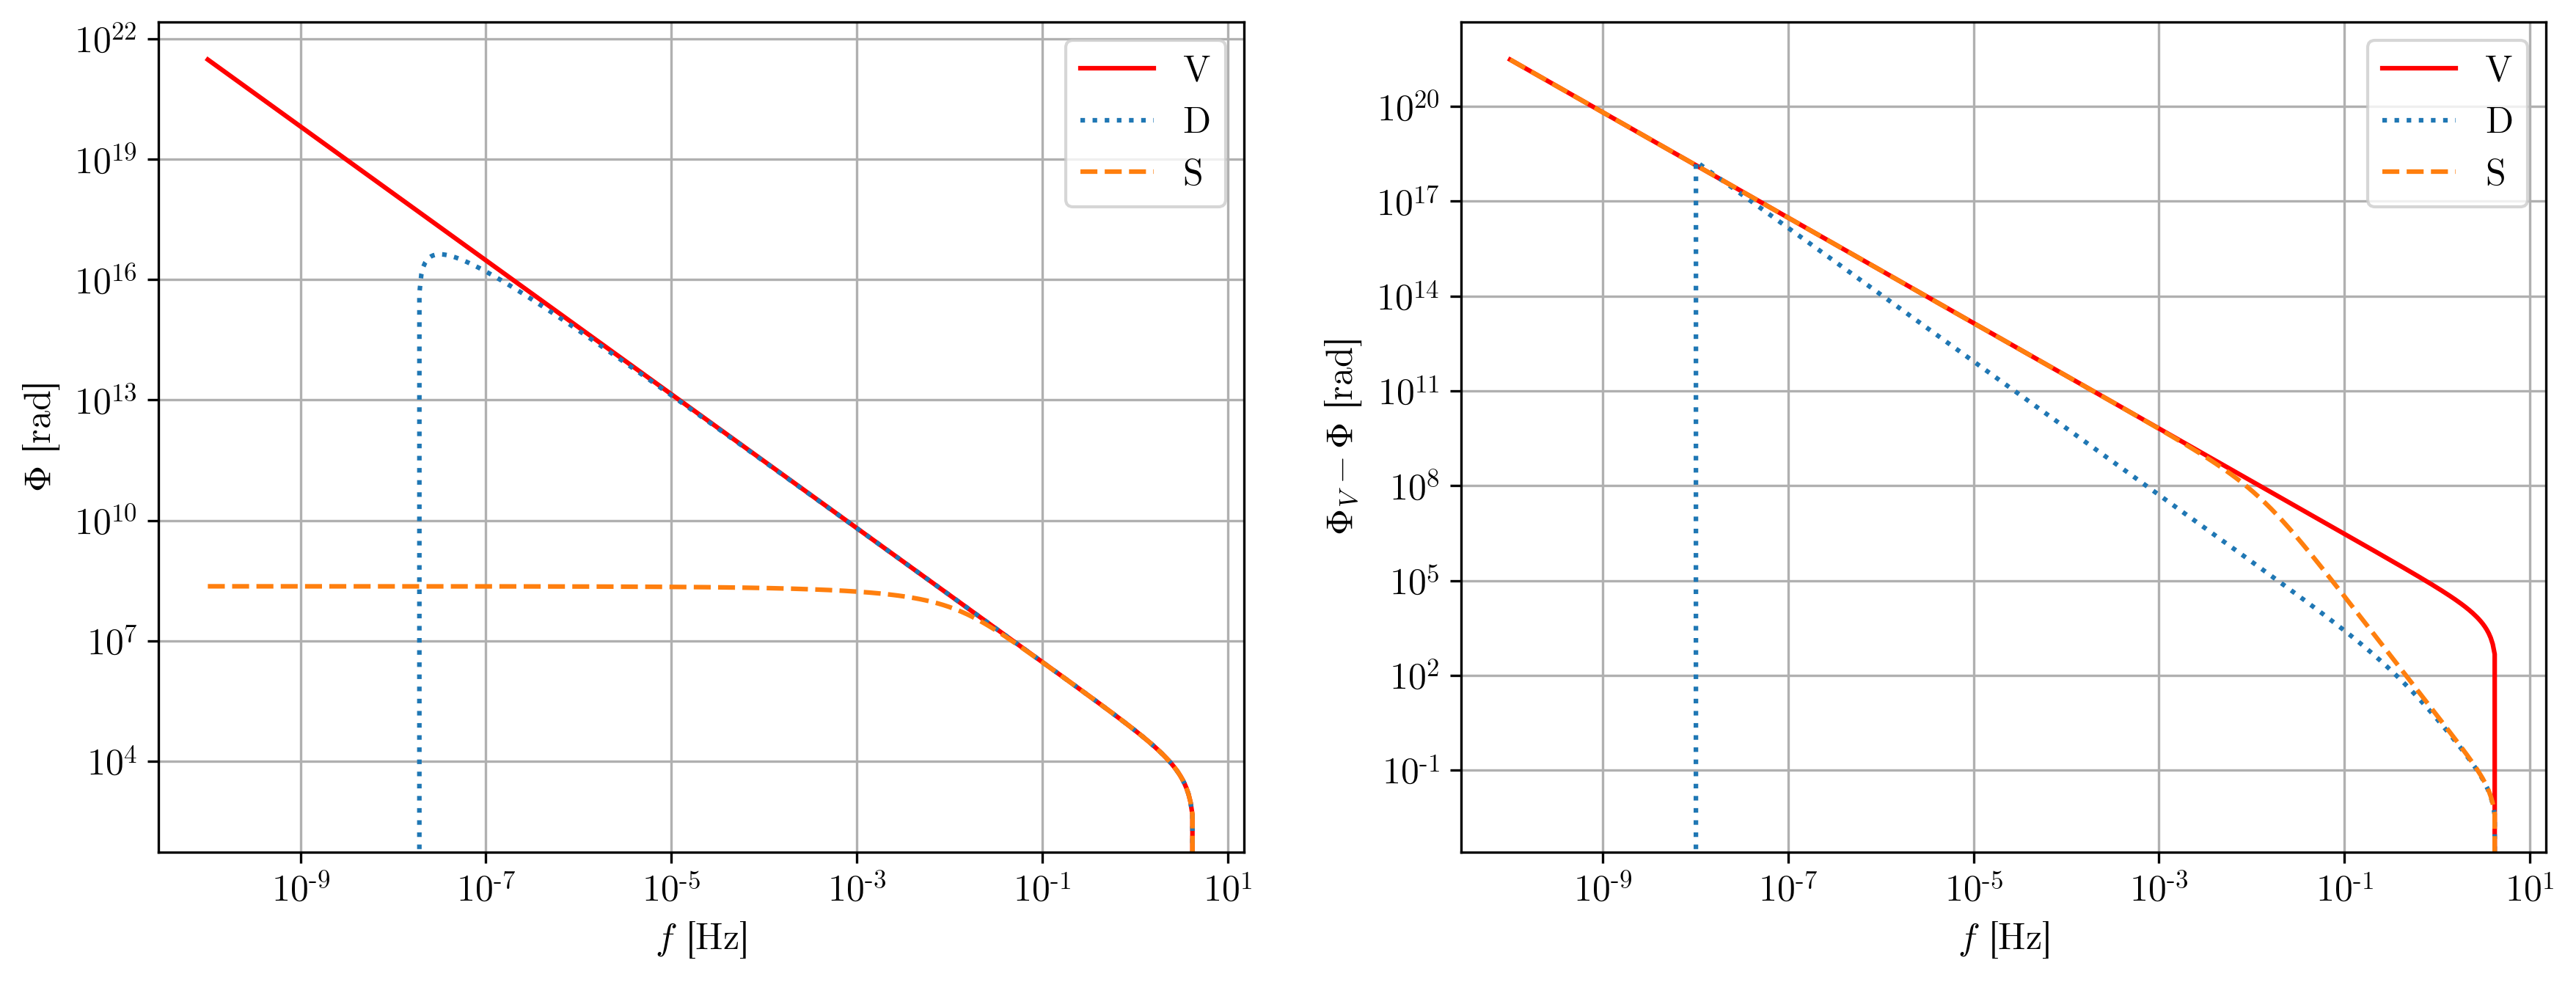

In [40]:
f = np.geomspace(1e-10, f_c, 500)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax = axes[0]
ax.loglog(f, vb.Phi_to_c(f, f_c), "r", label="V")
ax.loglog(f, dd.Phi_to_c(f, f_c), ":", label="D")
ax.loglog(f, sd.Phi_to_c(f, f_c), "--", label="S")
ax.legend()
ax.grid()
ax.set_xlabel(r"$f$ [Hz]")
ax.set_ylabel(r"$\Phi$ [rad]")

ax = axes[1]
ax.loglog(f, vb.Phi_to_c(f, f_c), "r", label="V")
ax.loglog(f, vb.Phi_to_c(f, f_c) - dd.Phi_to_c(f, f_c), ":", label="D")
ax.loglog(f, vb.Phi_to_c(f, f_c) - sd.Phi_to_c(f, f_c), "--", label="S")
ax.legend()
ax.grid()
ax.set_xlabel(r"$f$ [Hz]")
ax.set_ylabel(r"$\Phi_V - \Phi$ [rad]")

## Jax-ifying

In [15]:
arr = jnp.array([1, 2, 3.])

In [17]:
arr.shape + arr.shape

(3, 3)

In [ ]:
def interp2d(x, y, xp, yp, zp, fill_value=jnp.nan):
    if xp.shape != yp.shape or xp.ndim != 1:
        raise ValueError("xp and yp must be 1D arrays of the same length")
    if zp.shape != (xp.shape + yp.shape):
        raise ValueError("zp must be a 2D array with shape xp.shape + yp.shape")
    
    i_x = jnp.clip(jnp.searchsorted(xp, x, side="right"), 1, len(xp) - 1)
    i_y = jnp.clip(jnp.searchsorted(yp, y, side="right"), 1, len(yp) - 1)
    f_11 = fp[]